<a href="https://colab.research.google.com/github/FM1900/DataScience/blob/master/Dados_do_Airbnb_Floren%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Florença*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Florença, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/italy/toscana/florence/2020-10-24/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* ...
* ... 
* ...

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78210,11.24392,Entire home/apt,70,2,1,2019-09-27,0.08,4,365
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,70,2,3,2019-04-21,0.02,4,365
2,24471,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,135,2,0,NaN,NaN,4,365
3,24472,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,120,2,2,2012-04-11,0.02,4,365
4,31840,A Residenza Martin Classic room,380378,Officina 360,NaN,Centro Storico,43.77709,11.25216,Private room,41,1,120,2020-10-09,0.95,26,159


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11740
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.189353
last_review                       0.189353
name                              0.000170
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

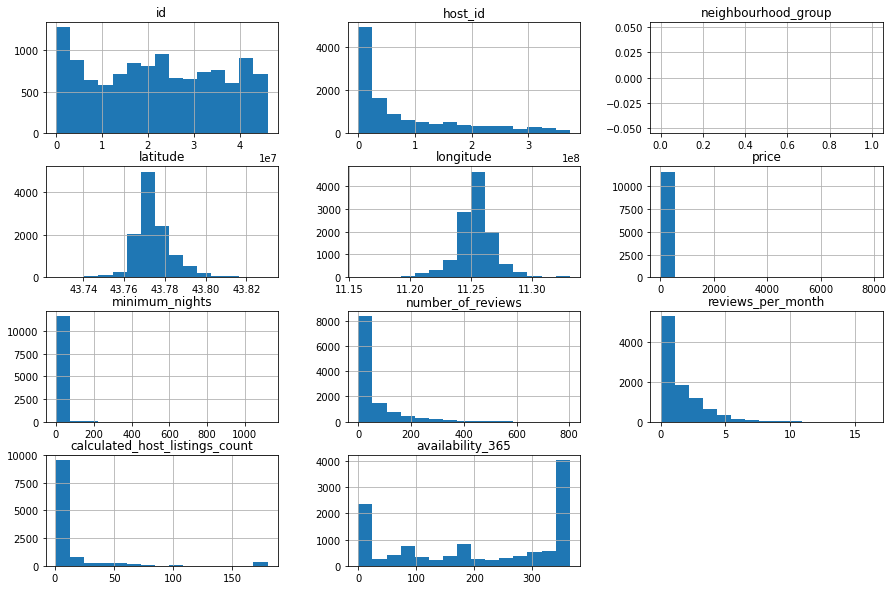

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

### **Histogramas sem outliers**
Observa-se que há outliers nas variáveis **price e minimum_nights**, para extrair dados fidedignos é preciso limpar o DataFrame e plotar novamente o histograma.

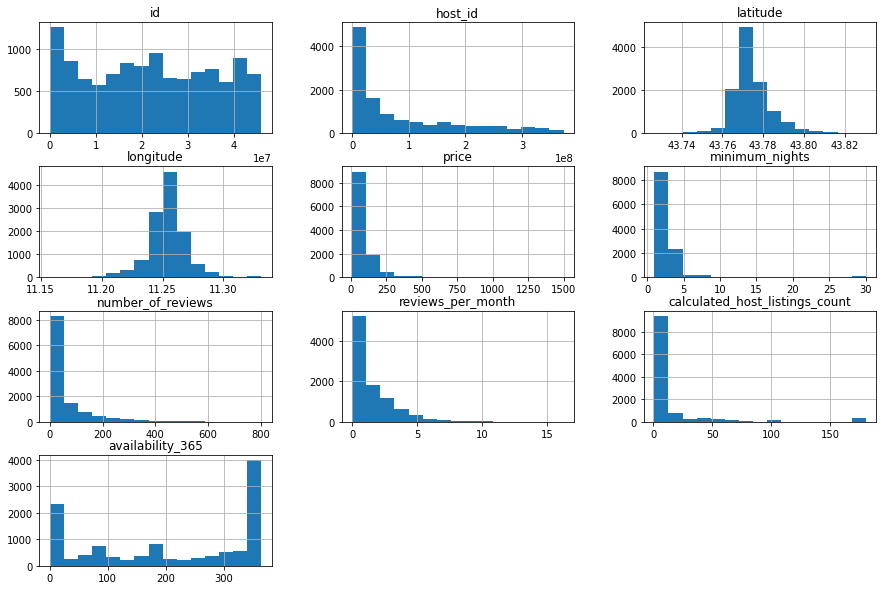

In [6]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``



TypeError: ignored

### **Q4. Qual a correlação existente entre as variáveis**

Estamos buscando relação ou semelhança entre duas variáveis.
Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:
Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.007885,-0.137057,-0.148755,0.169092,0.032181
minimum_nights,0.007885,1.000000,-0.061987,-0.091101,-0.007331,-0.017839
number_of_reviews,-0.137057,-0.061987,1.000000,0.808618,-0.106258,0.036956
reviews_per_month,-0.148755,-0.091101,0.808618,1.000000,-0.127898,0.008203
calculated_host_listings_count,0.169092,-0.007331,-0.106258,-0.127898,1.000000,-0.075363
availability_365,0.032181,-0.017839,0.036956,0.008203,-0.075363,1.000000


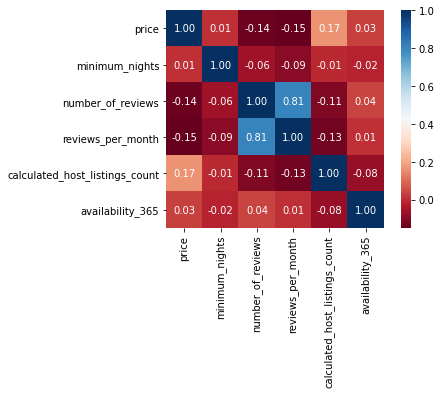

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8863
Private room       2489
Hotel room          252
Shared room          37
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.761361
Private room       0.213813
Hotel room         0.021648
Shared room        0.003178
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Gavinana Galluzzo    107.582969
Centro Storico       102.205292
Campo di Marte        80.907016
Isolotto Legnaia      67.375701
Rifredi               61.863864
Name: price, dtype: float64

Verifica-se que bairros  Gavinana Galluzzo, Centro Storico, Campo di Marte e Isolotto Legnaia são os que estão acima da média. Mas será que os números refletem a realidade?
Vamos analisar melhor melhor

In [36]:
# ver quantidade de imóveis em Gavinana Galluzzo
print(df_clean[df_clean.neighbourhood == "Gavinana Galluzzo"].shape)

# ver as 3 entradas em Gavinana Galluzzo
df_clean[df_clean.neighbourhood == "Gavinana Galluzzo"]



(458, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,32120,Welcome at Corte Verde in Florence,99235,Lucia,Gavinana Galluzzo,43.76352,11.27726,Entire home/apt,75,1,15,2019-04-28,0.12,1,89
50,75803,B&B Borgo Ponte all'Asse,403066,Paola,Gavinana Galluzzo,43.74343,11.21368,Private room,100,2,8,2018-09-19,0.07,2,303
70,99764,Michelangelo Guesthouse,525133,Niccolò,Gavinana Galluzzo,43.76346,11.27101,Private room,129,2,0,NaN,NaN,1,365
80,128907,Il Podesta Apartment in Florence,636702,Massimiliano Lepri,Gavinana Galluzzo,43.74913,11.23474,Entire home/apt,40,1,178,2020-01-03,1.59,1,346
88,134517,House in the Florentine countryside,660100,Fabiola,Gavinana Galluzzo,43.74121,11.25806,Private room,65,2,106,2019-09-12,0.94,1,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,45495518,Relax Suites Ginestra,46784513,Maria Pia,Gavinana Galluzzo,43.74096,11.23536,Entire home/apt,158,2,0,NaN,NaN,2,328
11666,45709711,"Indipendente, giardino, confort x lunghi soggi...",16940470,Claudio,Gavinana Galluzzo,43.75731,11.24168,Entire home/apt,48,3,0,NaN,NaN,2,323
11682,45819224,Grande camera con bagno privato vicino città,1179281,Francesco,Gavinana Galluzzo,43.76043,11.27813,Private room,60,5,0,NaN,NaN,2,89
11683,45821706,CASA CONFORTEVOLE VICINO AL CENTRO,137284512,Maddalena,Gavinana Galluzzo,43.76071,11.28416,Entire home/apt,48,1,0,NaN,NaN,1,90


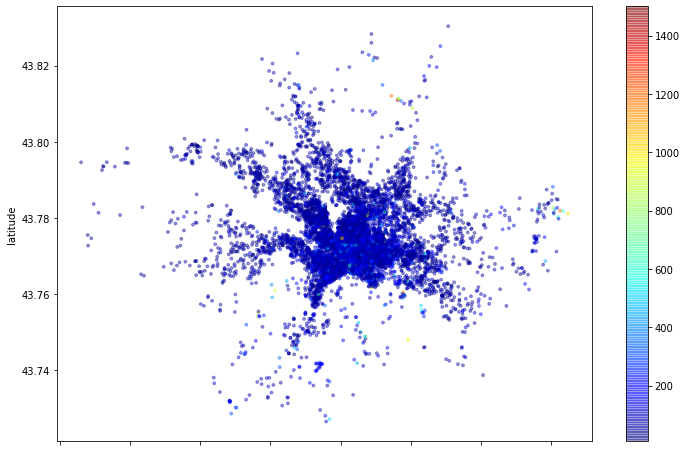

In [37]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

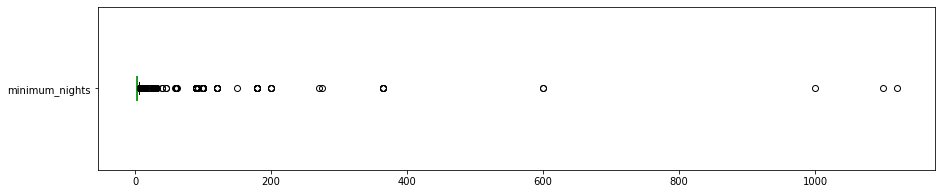

minimum_nights: valores acima de 30:
79 entradas
0.6729%


In [7]:

# ver a média da coluna `minimum_nights``

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

## Conclusões


Após  essa análise superficial na base de dados do Airbnb, já se percebeu que existem outliers em algumas das variáveis. 
Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Contudo, verificou-se que é  possível realizar uma avaliação dos dados com o devido saneamento das informações.